**RQ2: How does SLIM_GSGP behave in terms of performance and model size compared to standard GP and traditional GSGP?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 100, #will be 200 for final version
    'n_iter': 500,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_gp = {

    'p_xo': 0.8,
    'max_depth': 17

}

basic_config_gsgp = {

    'p_xo': 0,
    'ms_lower': 0,
    'ms_upper': 1,
    'reconstruct' : True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': 0.5,
    'reconstruct': True,
    'copy_parent': True

}









In [33]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *
import warnings
warnings.filterwarnings("ignore")
settings_dict = {'': 'name'}
ana = Analysis('newdata2', settings_dict)

Visualization of the Train and Test Error (RMSE) Evolution. 


<span style="color:#050505;">&#9632; GP</span>
<span style="color:#7a7a7a;">&#9632; GSGP</span>
<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>


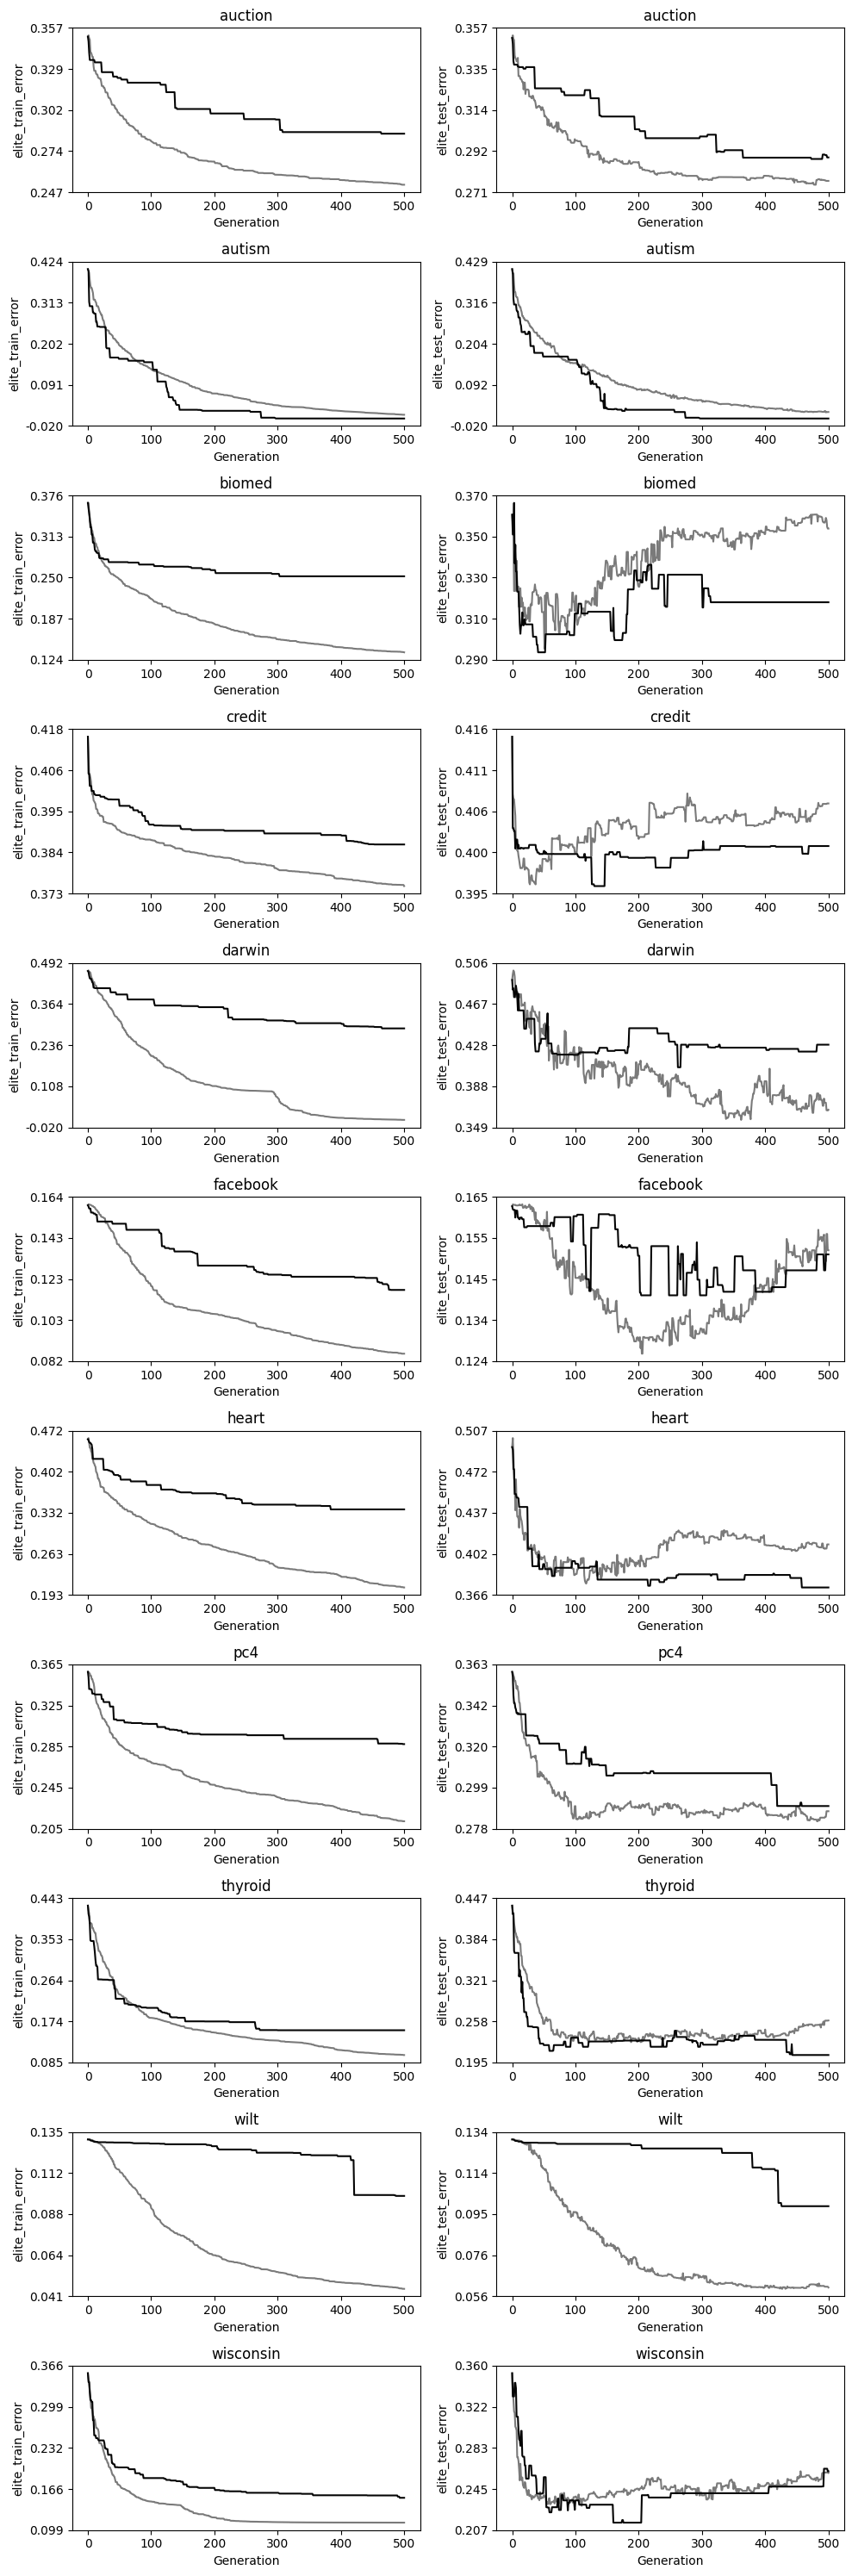

In [34]:
error_evolution_plot(ana.logs)

Median Test Error of the Final Individual

In [35]:
get_aggregated_performance(ana.results, metric='test.rmse', agg='median')

config_settings,GP_,GSGP_
dataset_name,,
auction,0.288906,0.276664
autism,0.000000,0.017856
biomed,0.317814,0.353502
credit,0.401280,0.406589
darwin,0.428122,0.365933
facebook,0.150755,0.151783
heart,0.372880,0.409711
pc4,0.289310,0.286619
thyroid,0.206857,0.259717


In [36]:
get_aggregated_performance(ana.results, metric='test.rmse', agg='median')

config_settings,GP_,GSGP_
dataset_name,,
auction,0.288906,0.276664
autism,0.000000,0.017856
biomed,0.317814,0.353502
credit,0.401280,0.406589
darwin,0.428122,0.365933
facebook,0.150755,0.151783
heart,0.372880,0.409711
pc4,0.289310,0.286619
thyroid,0.206857,0.259717


P-Values of the Wilcoxon Test comparing the Test Error of the Final Individual

'+': Smaller Test Error at 5% significance level

'-': Larger Test Error at 5% significance level

'&approx;': No significant difference

In [37]:
get_slim_performance_difference_significance_table(ana.results, 'test.rmse')

KeyError: 'SLIM*SIG1_'

Visualization of the Tree Size Evolution


<span style="color:#050505;">&#9632; GP</span>
<span style="color:#7a7a7a;">&#9632; GSGP</span>
<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

IndexError: index 5 is out of bounds for axis 0 with size 5

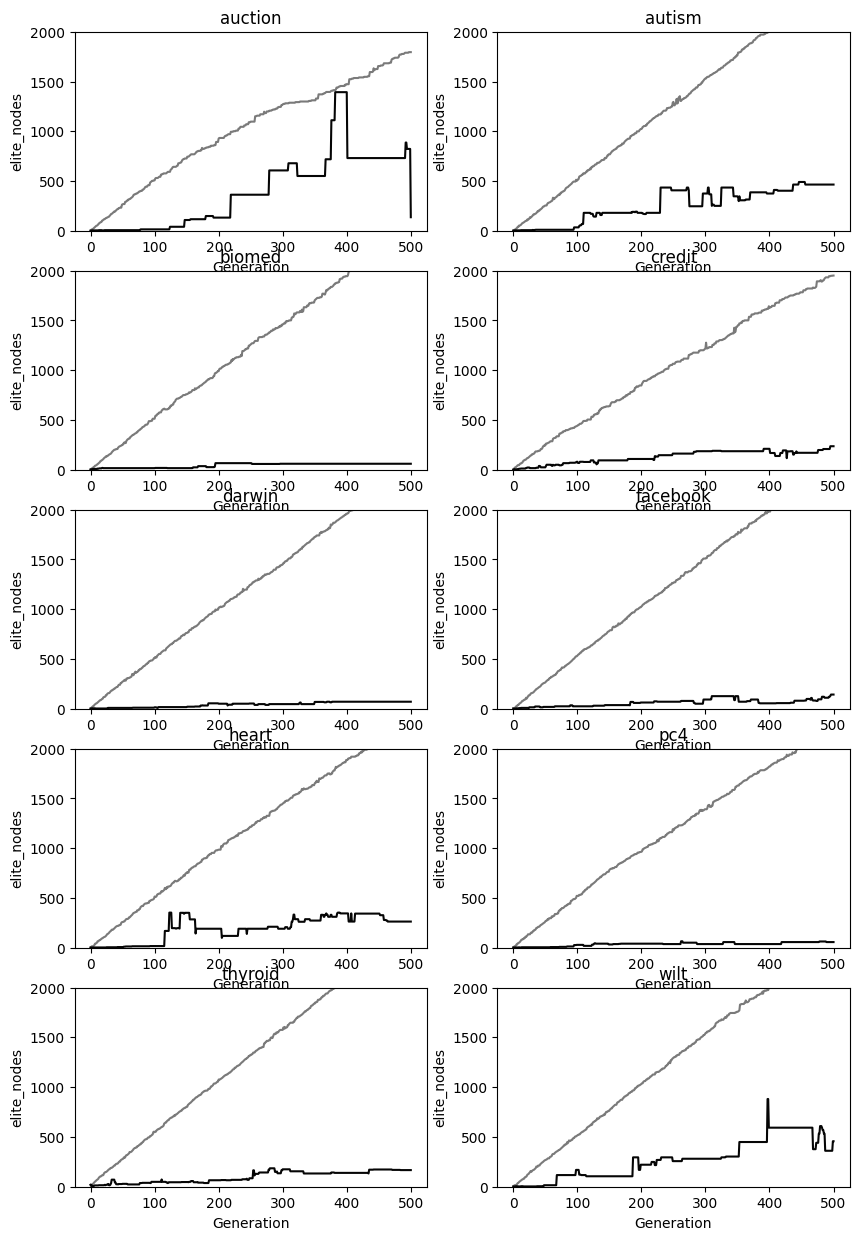

In [38]:
tree_size_evolution_plot(ana.logs)

Median Tree Size of the final Individual 

In [39]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,GP_,GSGP_
dataset_name,,
auction,137.0,1795.0
autism,465.0,2541.0
biomed,61.0,2377.0
credit,237.0,1951.0
darwin,71.0,2413.0
facebook,143.0,2493.0
heart,263.0,2309.0
pc4,57.0,2189.0
thyroid,167.0,2567.0


P-Values of the Wilcoxon Test comparing the Tree Size of the Final Individual

'+': Smaller Tree Size at 5% significance level

'-': Larger Tree Size at 5% significance level

'&approx;': No significant difference

In [ ]:
get_slim_performance_difference_significance_table(ana.results, metric = 'nodes_count')

config1_v_config2,SLIM*SIG1__VS_GP_,SLIM*SIG1__VS_GSGP_,SLIM*SIG2__VS_GP_,SLIM*SIG2__VS_GSGP_,SLIM+SIG1__VS_GP_,SLIM+SIG1__VS_GSGP_,SLIM+SIG2__VS_GP_,SLIM+SIG2__VS_GSGP_
dataset_name,,,,,,,,
auction,1.000 (≈),0.016 (+),0.938 (≈),0.016 (+),0.938 (≈),0.016 (+),0.938 (≈),0.016 (+)
autism,0.016 (-),0.016 (+),0.016 (-),0.016 (+),0.016 (-),0.016 (+),0.016 (-),0.016 (+)
biomed,0.031 (+),0.016 (+),0.031 (+),0.016 (+),0.078 (≈),0.016 (+),0.219 (≈),0.016 (+)
caesarian,0.078 (≈),0.016 (+),0.219 (≈),0.016 (+),0.078 (≈),0.016 (+),0.156 (≈),0.016 (+)
credit,0.173 (≈),0.016 (+),0.938 (≈),0.016 (+),0.938 (≈),0.016 (+),0.469 (≈),0.016 (+)
darwin,0.016 (-),0.016 (+),0.016 (-),0.016 (+),0.016 (-),0.016 (+),0.016 (-),0.016 (+)
facebook,0.047 (-),0.046 (+),0.109 (≈),0.043 (+),0.078 (≈),0.043 (+),0.078 (≈),0.043 (+)
landmines,0.016 (+),0.016 (+),0.016 (+),0.016 (+),0.016 (+),0.016 (+),0.016 (+),0.016 (+)
student,0.938 (≈),0.031 (+),0.078 (≈),0.031 (+),0.600 (≈),0.028 (+),0.173 (≈),0.028 (+)


Plot for Comparison of the Average Rank accross Datasets regarding different Evaluation Metrics

<span style="color:#050505;">&#9632; GP</span>
<span style="color:#7a7a7a;">&#9632; GSGP</span>
<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

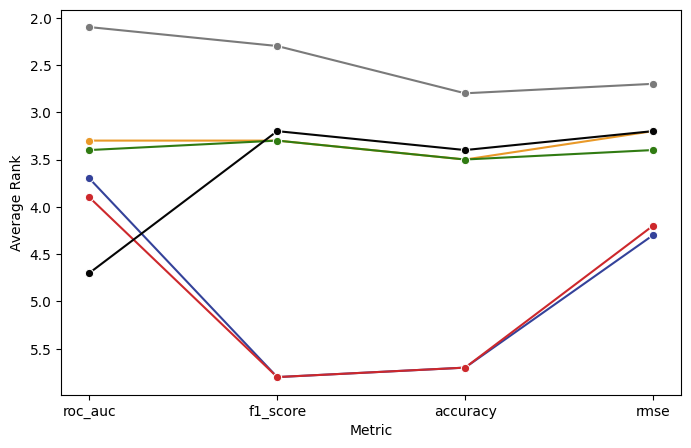

In [ ]:
plot_avg_ranking_multimetrix(ana.results)

Friedman Test results

In [ ]:
get_multimetric_ranking_significance(ana.results)

P-Value of the Friedman Test for ranks regarding Accuracy: 0.00180
P-Value of the Friedman Test for ranks regarding F1-Score: 0.00002
P-Value of the Friedman Test for ranks regarding ROC-AUC: 0.05276
P-Value of the Friedman Test for ranks regarding RMSE: 0.34711
